<a href="https://colab.research.google.com/github/RahulArra/Machine-Learning/blob/main/CLustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

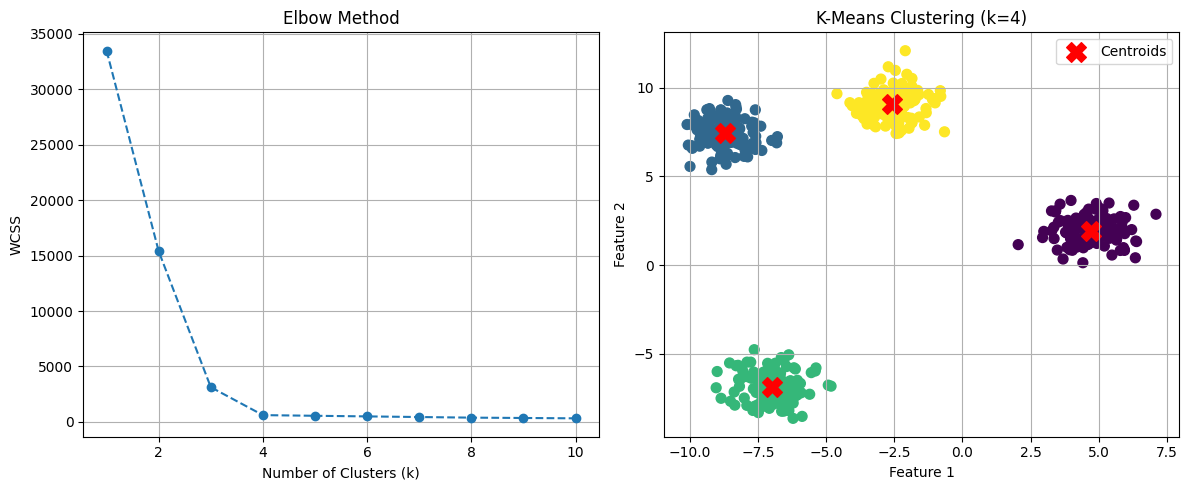

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 1. Generate data
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=0.8, random_state=42)

# 2. Elbow Method to find optimal k
wcss = []
k_range = range(1, 11)
for k in k_range:
    kmeans_elbow = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_elbow.fit(X)
    wcss.append(kmeans_elbow.inertia_)

# Plot Elbow Method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)

# 3. Apply K-Means with optimal k and visualize
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

# Plot Clusters
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title(f'K-Means Clustering (k={optimal_k})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

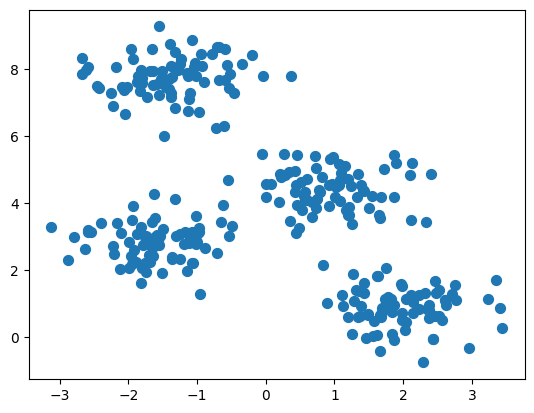

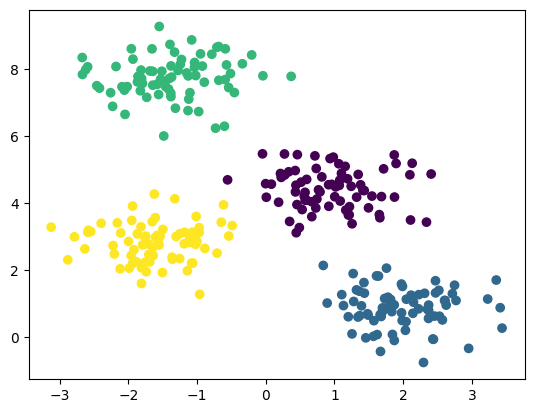

In [2]:
#K-Means Clustering Program
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate sample data
X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=0.60)

# Plot the generated data
plt.scatter(X[:,0], X[:,1], s=50)
plt.show()

# Fit the KMeans model to the data
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)

# Predict the cluster labels
y_pred = kmeans.predict(X)

# Plot the resulting clusters
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='viridis')
plt.show()


In [3]:
import numpy as np

# --- Helper Vectors & Sets for Demonstration ---
vec_a = np.array([1, 2, 3])
vec_b = np.array([4, 5, 6])

set_a = {1, 2, 3, 4, 5}
set_b = {4, 5, 6, 7, 8}

# 1. Euclidean Distance
def euclidean_distance(v1, v2):
    return np.sqrt(np.sum((v1 - v2)**2))

# 2. Manhattan Distance
def manhattan_distance(v1, v2):
    return np.sum(np.abs(v1 - v2))

# 3. Cosine Similarity and Distance
def cosine_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)
    return dot_product / (norm_v1 * norm_v2)

def cosine_distance(v1, v2):
    return 1 - cosine_similarity(v1, v2)

# 4. Minkowski Distance
def minkowski_distance(v1, v2, p):
    return np.sum(np.abs(v1 - v2)**p)**(1/p)

# 5. Jaccard Index and Distance
def jaccard_index(s1, s2):
    # Ensure inputs are sets
    s1 = set(s1)
    s2 = set(s2)
    intersection = len(s1.intersection(s2))
    union = len(s1.union(s2))
    return intersection / union

def jaccard_distance(s1, s2):
    """Calculates the Jaccard distance between two sets."""
    return 1 - jaccard_index(s1, s2)

# --- Demonstrations ---
print("--- Using Vectors ---")
print(f"Vector A: {vec_a}")
print(f"Vector B: {vec_b}\n")

print(f"1. Euclidean Distance: {euclidean_distance(vec_a, vec_b):.4f}")
print(f"2. Manhattan Distance: {manhattan_distance(vec_a, vec_b)}")
print(f"3. Cosine Similarity: {cosine_similarity(vec_a, vec_b):.4f}")
print(f"   Cosine Distance:  {cosine_distance(vec_a, vec_b):.4f}")
print(f"4. Minkowski Distance (p=3): {minkowski_distance(vec_a, vec_b, p=3):.4f}")

print("\n--- Using Sets ---")
print(f"Set A: {set_a}")
print(f"Set B: {set_b}\n")
print(f"5. Jaccard Index (Similarity): {jaccard_index(set_a, set_b):.4f}")
print(f"   Jaccard Distance:         {jaccard_distance(set_a, set_b):.4f}")

--- Using Vectors ---
Vector A: [1 2 3]
Vector B: [4 5 6]

1. Euclidean Distance: 5.1962
2. Manhattan Distance: 9
3. Cosine Similarity: 0.9746
   Cosine Distance:  0.0254
4. Minkowski Distance (p=3): 4.3267

--- Using Sets ---
Set A: {1, 2, 3, 4, 5}
Set B: {4, 5, 6, 7, 8}

5. Jaccard Index (Similarity): 0.2500
   Jaccard Distance:         0.7500


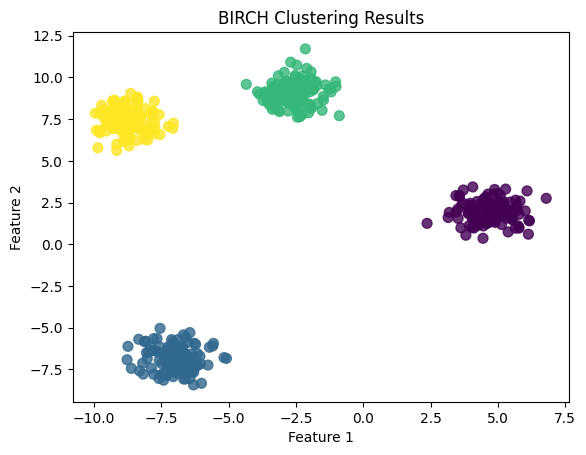

In [4]:
import numpy as np
from sklearn.cluster import Birch
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=500, centers=4, cluster_std=0.7, random_state=42)

brc = Birch(threshold=0.5, n_clusters=4)
brc.fit(X)

# Get cluster labels
labels = brc.predict(X)

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.8)
plt.title("BIRCH Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

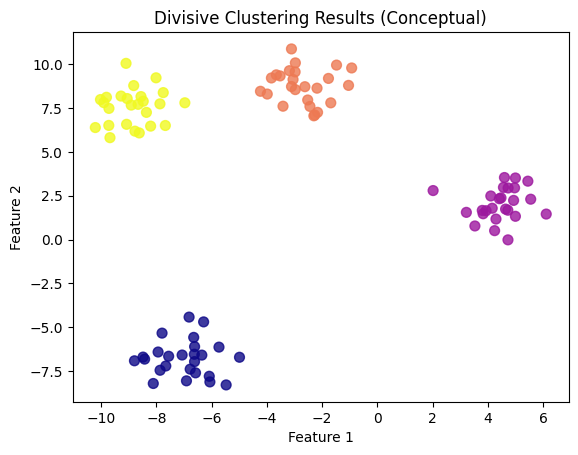

In [5]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.metrics.pairwise import euclidean_distances



def divisive_clustering(X, n_clusters):

    # 1. Start with all data points in one cluster
    clusters = [list(range(len(X)))]

    while len(clusters) < n_clusters:
        # 2. Find the cluster with the largest diameter to split
        largest_cluster_idx = -1
        max_diameter = -1

        for i, cluster in enumerate(clusters):
            if len(cluster) > 1:
                # Calculate pairwise distances within the cluster
                distances = euclidean_distances(X[cluster], X[cluster])
                diameter = np.max(distances)
                if diameter > max_diameter:
                    max_diameter = diameter
                    largest_cluster_idx = i

        if largest_cluster_idx == -1:
            break

        # The cluster to be split
        cluster_to_split = clusters.pop(largest_cluster_idx)
        points_in_cluster = X[cluster_to_split]

        # 3. Naive split: Use KMeans with k=2 to split the largest cluster
        # (A true DIANA implementation has a more complex splitting logic)
        from sklearn.cluster import KMeans
        kmeans = KMeans(n_clusters=2, n_init='auto', random_state=42)
        kmeans.fit(points_in_cluster)

        # Create the two new clusters from the split
        new_cluster_1_indices = np.array(cluster_to_split)[kmeans.labels_ == 0]
        new_cluster_2_indices = np.array(cluster_to_split)[kmeans.labels_ == 1]

        clusters.append(list(new_cluster_1_indices))
        clusters.append(list(new_cluster_2_indices))

    # Create the final labels array
    labels = np.zeros(len(X), dtype=int)
    for i, cluster in enumerate(clusters):
        for point_idx in cluster:
            labels[point_idx] = i

    return labels

# Generate sample data
X, y = make_blobs(n_samples=100, centers=4, random_state=42, cluster_std=1.0)

# Get labels from our divisive algorithm
labels = divisive_clustering(X, n_clusters=4)

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='plasma', s=50, alpha=0.8)
plt.title("Divisive Clustering Results (Conceptual)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

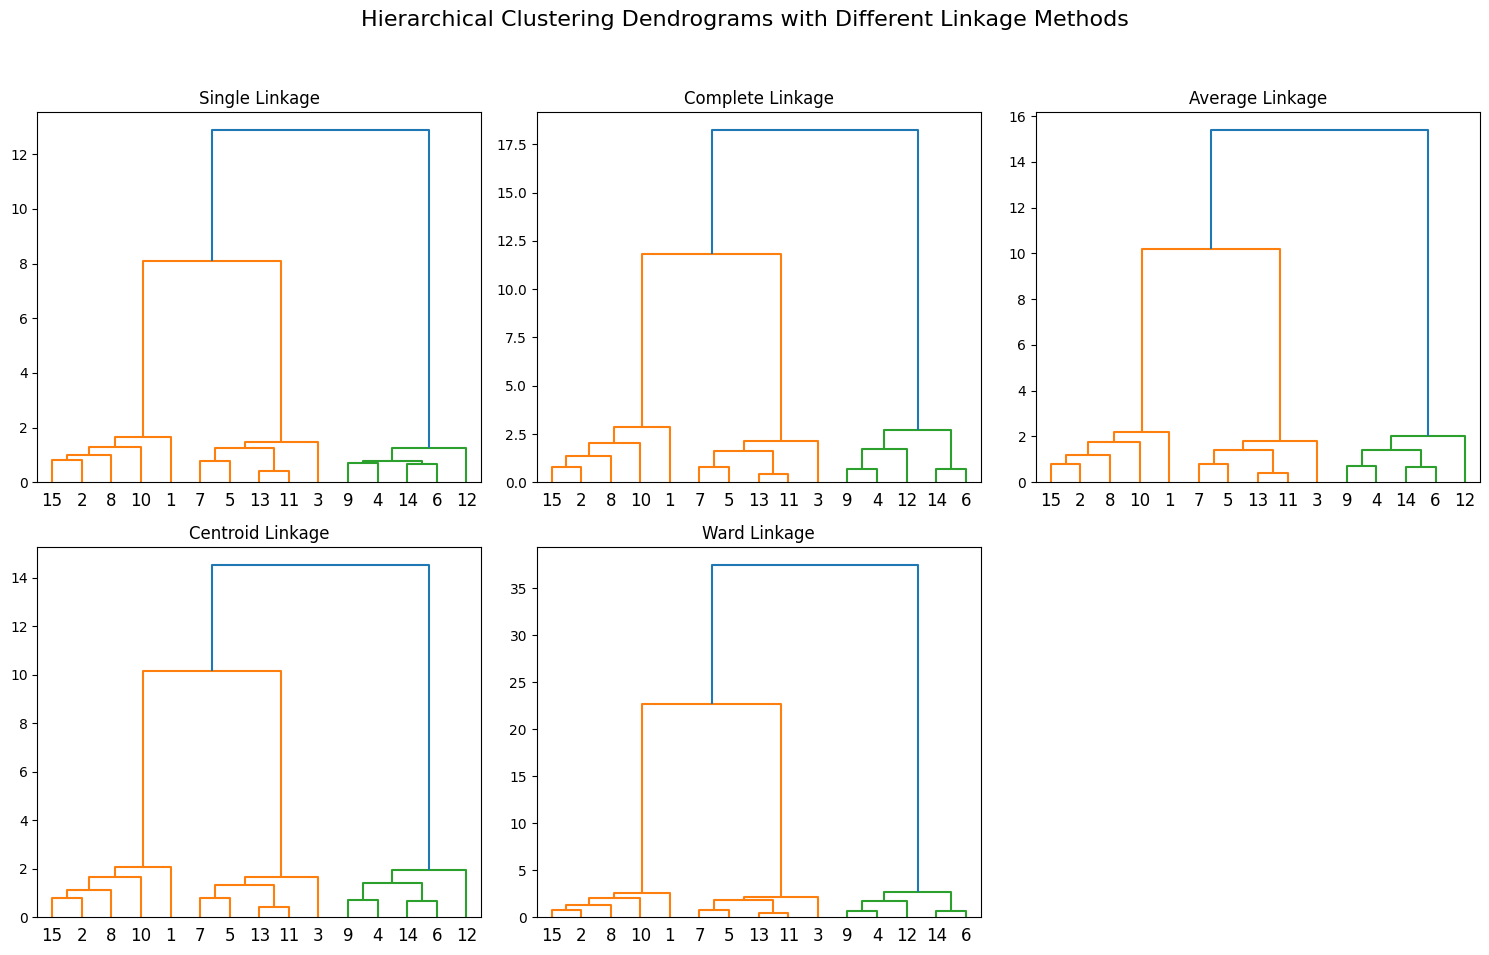

In [6]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# 1. Generate sample data
# Using make_blobs to create distinct groups
X, y = make_blobs(n_samples=15, n_features=2, centers=3,
                  cluster_std=0.8, random_state=42)

# 2. Define linkage methods to compare
linkage_methods = ['single', 'complete', 'average', 'centroid', 'ward']

# Create a figure to hold the dendrograms
plt.figure(figsize=(15, 10))
plt.suptitle("Hierarchical Clustering Dendrograms with Different Linkage Methods", fontsize=16)

# 3. Loop through each linkage method and plot its dendrogram
for i, method in enumerate(linkage_methods):
    plt.subplot(2, 3, i + 1)
    plt.title(f"{method.capitalize()} Linkage")

    # Perform hierarchical clustering using the specified linkage method
    linked = linkage(X, method=method)

    # Plot the dendrogram
    dendrogram(linked,
               orientation='top',
               labels=np.arange(1, 16), # Label our data points
               distance_sort='descending',
               show_leaf_counts=True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()